<a href="https://www.kaggle.com/code/pranal17/e-commerce-product-performance-eda?scriptVersionId=237856983" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-product-performance-dataset/ecommerce_product_performance.csv


* Description:
This synthetic yet realistic dataset contains 2,000 records representing product performance metrics in an e-commerce environment. Designed for intermediate-level data science and machine learning tasks, the dataset includes natural randomness, missing values (~5% per column), and varying distributions, mimicking real-world conditions.

* Columns Explanation:

+ Product_Price: The listed price of the product in USD (range: 5 to 1000).
+ Discount_Rate: Discount rate applied to the product (0.0 to 0.8).
+ Product_Rating: Customer rating on a scale from 1 to 5.
+ Number_of_Reviews: Total number of user reviews (0 to 5000, highly skewed).
+ Stock_Availability: Product availability in stock (1 = available, 0 = out of stock).
+ Days_to_Deliver: Number of days it takes to deliver the product (1 to 30).
+ Return_Rate: Proportion of items returned after purchase (0.0 to 0.9).
+ Category_ID: ID of the product category (integer from 1 to 10).

## 1. 📌 Introduction
This project aims to analyze product-level performance from an e-commerce dataset. It explores how price, rating, delivery time, discounts, stock availability, and returns vary across product categories.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'/kaggle/input/e-commerce-product-performance-dataset/ecommerce_product_performance.csv')

## 2. 🗃️ Data Overview
- Dataset Columns:
    - `Category_ID`
    - `Product_Price`
    - `Discount`
    - `Product_Rating`
    - `Stock_Availability`
    - `Days_to_Deliver`
    - `Return_Rate`
- Basic info: null values, datatypes, shape

In [5]:
df.sample(5)

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
322,68.177932,0.476372,4.949487,151.0,1.0,13.0,0.041056,7.0
1482,322.696385,0.300411,5.000000,37.0,1.0,6.0,0.202781,2.0
1980,52.834327,0.435397,3.446347,400.0,1.0,26.0,0.274800,9.0
934,194.001445,0.422427,4.072518,716.0,1.0,29.0,0.301569,3.0
919,169.408999,NaN,4.023995,142.0,1.0,6.0,0.631117,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       1900 non-null   float64
 1   Discount_Rate       1900 non-null   float64
 2   Product_Rating      1900 non-null   float64
 3   Number_of_Reviews   1900 non-null   float64
 4   Stock_Availability  1900 non-null   float64
 5   Days_to_Deliver     1900 non-null   float64
 6   Return_Rate         1900 non-null   float64
 7   Category_ID         1900 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


In [7]:
df.isnull().sum()

Product_Price         100
Discount_Rate         100
Product_Rating        100
Number_of_Reviews     100
Stock_Availability    100
Days_to_Deliver       100
Return_Rate           100
Category_ID           100
dtype: int64

In [8]:
df[df.Product_Price.isnull()]

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
18,NaN,0.174789,4.943566,454.0,1.0,3.0,0.168136,3.0
23,NaN,0.124779,1.278395,366.0,1.0,13.0,0.307387,2.0
48,NaN,NaN,5.000000,1300.0,1.0,22.0,0.321321,9.0
66,NaN,0.159130,4.025270,46.0,1.0,18.0,0.318126,8.0
95,NaN,0.620468,4.547546,367.0,1.0,27.0,0.190052,8.0
...,...,...,...,...,...,...,...,...
1943,NaN,0.245719,3.753503,489.0,1.0,20.0,0.478035,8.0
1945,NaN,0.372729,3.210421,133.0,1.0,13.0,0.174335,8.0
1948,NaN,NaN,4.795527,14.0,1.0,14.0,0.258125,1.0
1992,NaN,0.256828,3.495332,343.0,0.0,20.0,0.160149,4.0


In [9]:
for i in ['Product_Price','Discount_Rate','Product_Rating','Return_Rate']:
    df[i] = df[i].round(2)

In [10]:
df.describe()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,156.774379,0.286968,3.729995,304.318421,0.903158,15.411579,0.328837,5.572105
std,93.484628,0.158998,0.885164,310.344539,0.295821,8.534049,0.176419,2.827601
min,5.000000,0.010000,1.000000,0.000000,0.000000,1.000000,0.010000,1.000000
25%,87.412500,0.167500,3.127500,86.750000,1.000000,8.000000,0.190000,3.000000
50%,153.665000,0.270000,3.770000,210.000000,1.000000,15.000000,0.310000,6.000000
75%,217.790000,0.390000,4.420000,429.000000,1.000000,22.000000,0.440000,8.000000
max,535.270000,0.800000,5.000000,2848.000000,1.000000,30.000000,0.900000,10.000000


## 3. 🧹 Data Cleaning
- Handling missing values:
    - Filled `Product_Price` using `groupby('Category_ID').transform('mean')`
    - Checked nulls after filling

In [11]:
# Filling null values for category id using mode - most frequent or repeated records
df['Category_ID'].fillna(df['Category_ID'].mode()[0],inplace=True)

In [12]:
# Calculating aggregations to decide about null values 
for item in df.columns[:-1]:
    print(item.upper())
    print(df.groupby('Category_ID')[item].agg(['mean','median','min','max']).round(2).reset_index())
    print()

PRODUCT_PRICE
   Category_ID    mean  median  min     max
0          1.0  149.51  149.20  5.0  369.05
1          2.0  157.46  162.00  5.0  402.69
2          3.0  163.46  148.10  5.0  457.89
3          4.0  156.27  160.86  5.0  407.97
4          5.0  156.30  155.83  5.0  535.27
5          6.0  151.15  148.06  5.0  469.31
6          7.0  145.82  137.96  5.0  407.34
7          8.0  157.12  151.56  5.0  410.17
8          9.0  162.40  174.66  5.0  399.30
9         10.0  171.09  159.71  5.0  463.77

DISCOUNT_RATE
   Category_ID  mean  median   min   max
0          1.0  0.26    0.26  0.01  0.65
1          2.0  0.30    0.28  0.01  0.79
2          3.0  0.31    0.29  0.01  0.79
3          4.0  0.30    0.29  0.03  0.66
4          5.0  0.28    0.25  0.01  0.75
5          6.0  0.28    0.26  0.01  0.64
6          7.0  0.28    0.24  0.02  0.77
7          8.0  0.29    0.27  0.01  0.80
8          9.0  0.29    0.26  0.02  0.80
9         10.0  0.29    0.26  0.01  0.77

PRODUCT_RATING
   Category_ID  mean

In [13]:
# Filling the following columns based on the mean of particular column by grouping category id
for item in ['Product_Price','Discount_Rate','Product_Rating','Return_Rate']:
    df[item] = df[item].fillna(df.groupby('Category_ID')[item].transform('mean').round(2))

In [14]:
# Filling the following columns based on the median of particular column by grouping category id
for item in ['Number_of_Reviews','Stock_Availability','Days_to_Deliver']:
    df[item] = df[item].fillna(df.groupby('Category_ID')[item].transform('median').round(2))

In [15]:
# Changed the required columns datatype to integers
df['Category_ID'] = df['Category_ID'].astype('int32')
df['Days_to_Deliver'] = df['Days_to_Deliver'].astype('int32')
df['Number_of_Reviews'] = df['Number_of_Reviews'].astype('int32')
df['Stock_Availability'] = df['Stock_Availability'].astype('int32')

In [16]:
df.isnull().mean() * 100

Product_Price         0.0
Discount_Rate         0.0
Product_Rating        0.0
Number_of_Reviews     0.0
Stock_Availability    0.0
Days_to_Deliver       0.0
Return_Rate           0.0
Category_ID           0.0
dtype: float64

## 4. 📊 Exploratory Data Analysis (EDA)

Business Questions & Analysis -

- Categorywise profit
- Categorywise stock availablity/ which stock is unavailable all time
- Categorywise days to deliver
- Categorywise return rate
- Categorywise discounts
- Most rated category based on product rating
- Product_pirce vs discount -> selling price (product_price - product_price*discount)
- Realtion between product_rating and product_price
- Maximum days required to deliver and for which catgory and whats it product rating
- Minimum days reuqired to deliver and for which category and whats it product rating
- product rating vs return rate
- max product price 
- min product price
- max discount applied
- min discount applied
- Top 5 best-selling categories (based on return rate & stock availability)
- High-priced products with low ratings (identify quality issues)
- Avg. discount given per category (are some categories always on sale?)
- Return Rate vs Discount – Are heavily discounted products returned more?
- Delivery time vs Rating – Does faster delivery mean better rating?
- Stock Availability vs Rating – Are highly rated products often out of stock?

------------------------------------------------------------------------------------------------------------------------------------------

📦 Inventory Analysis 
🛍️ Customer Behavior
🛒 Sales & Pricing Strategy
🚚 Logistics & Delivery
💸 Discount & Return Impact

In [17]:
# Categorywise profit

catProf = df.groupby('Category_ID')['Product_Price'].sum().reset_index().sort_values(by='Product_Price',ascending=False)
catProf

,Category_ID,Product_Price
7,8,48706.71
8,9,31668.19
5,6,31136.65
6,7,30038.67
9,10,29598.84
4,5,29383.56
3,4,28909.18
2,3,28769.44
0,1,27808.55
1,2,27556.17


[]

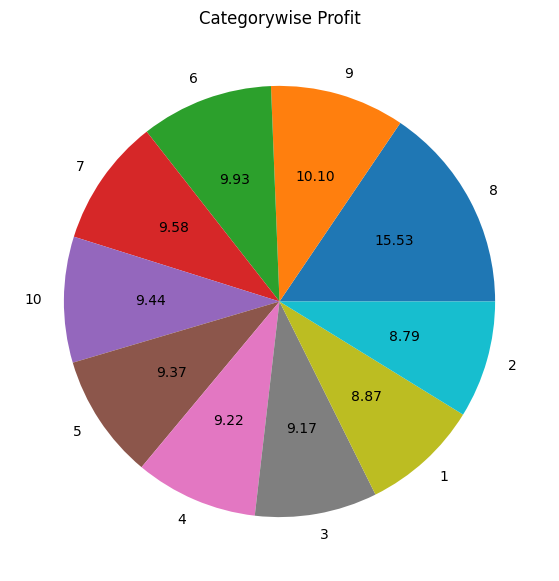

In [18]:
plt.figure(figsize=(12,7))
plt.pie(catProf['Product_Price'],labels = catProf['Category_ID'], autopct = '%.2f')
plt.title('Categorywise Profit')
plt.plot()

In [19]:
# Categorywise stock availablity/ which stock is unavailable all time
stock_df = df.groupby('Category_ID')['Stock_Availability'].value_counts().reset_index()
stock_df[stock_df['Stock_Availability'] == 0]

,Category_ID,Stock_Availability,count
1,1,0,17
3,2,0,12
5,3,0,16
7,4,0,18
9,5,0,17
11,6,0,21
13,7,0,16
15,8,0,27
17,9,0,21
19,10,0,19


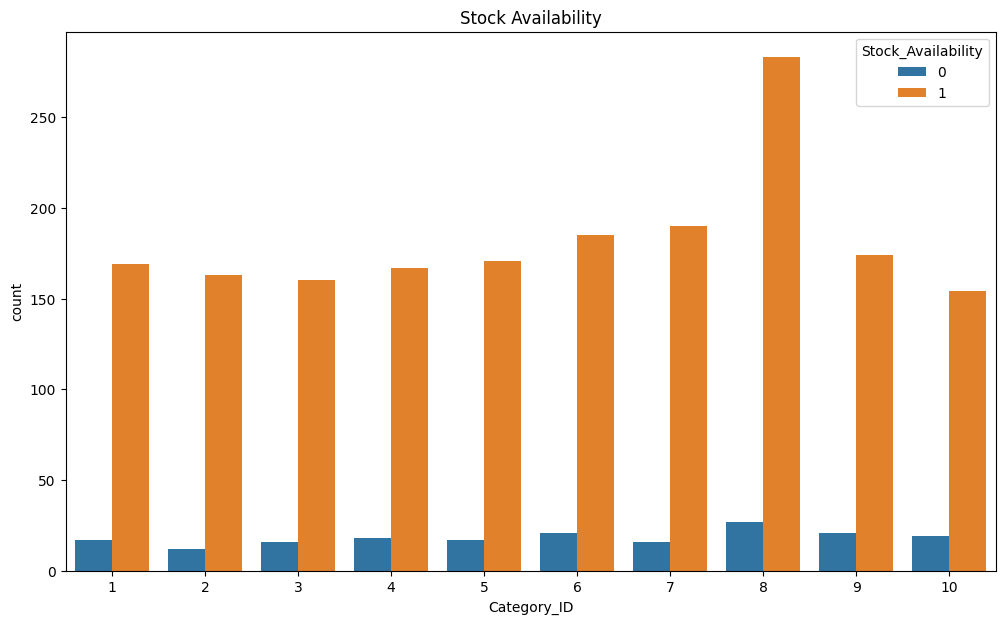

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(stock_df,x='Category_ID',y='count',hue='Stock_Availability')
plt.title('Stock Availability')
plt.show()

In [21]:
# Average days require to deliver for each category
delivery_df = df.groupby('Category_ID')['Days_to_Deliver'].mean().astype('int32').reset_index()
delivery_df

,Category_ID,Days_to_Deliver
0,1,15
1,2,15
2,3,16
3,4,14
4,5,16
5,6,16
6,7,14
7,8,14
8,9,15
9,10,15


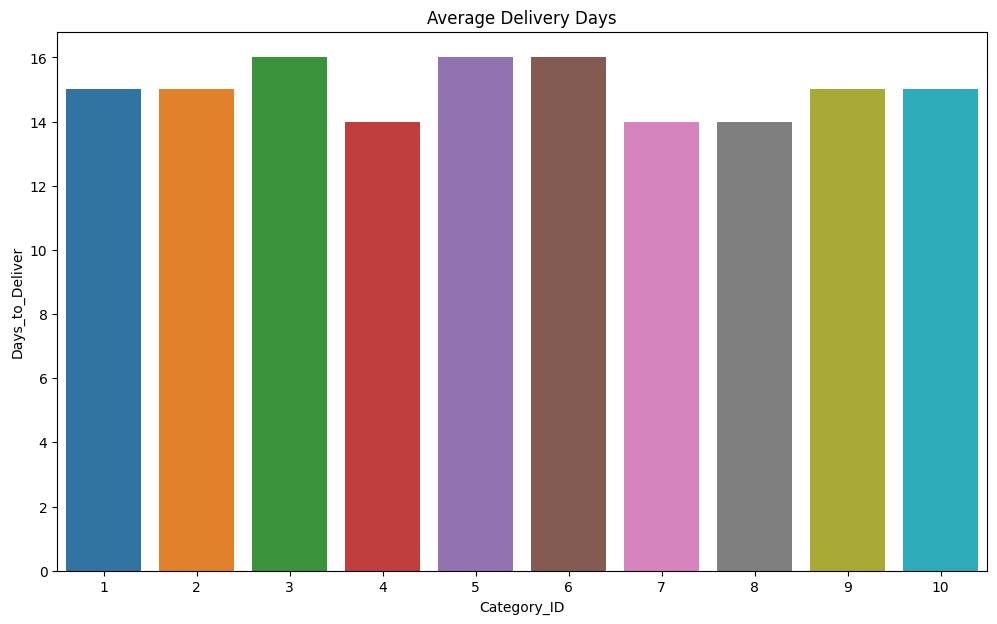

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(delivery_df,x='Category_ID',y='Days_to_Deliver')
plt.title('Average Delivery Days')
plt.show()

In [23]:
# Average Return Rate for each Categorywise

# df['Return_Rate'].plot(kind='kde')
df.groupby('Category_ID')['Return_Rate'].mean().round(2).reset_index()

,Category_ID,Return_Rate
0,1,0.33
1,2,0.31
2,3,0.34
3,4,0.32
4,5,0.34
5,6,0.32
6,7,0.33
7,8,0.34
8,9,0.32
9,10,0.34


In [24]:
# Maximum & Average discounted Category

df.groupby('Category_ID')['Discount_Rate'].agg(['mean','max']).round(2).reset_index()

,Category_ID,mean,max
0,1,0.26,0.65
1,2,0.30,0.79
2,3,0.31,0.79
3,4,0.30,0.66
4,5,0.28,0.75
5,6,0.28,0.64
6,7,0.28,0.77
7,8,0.29,0.80
8,9,0.29,0.80
9,10,0.29,0.77


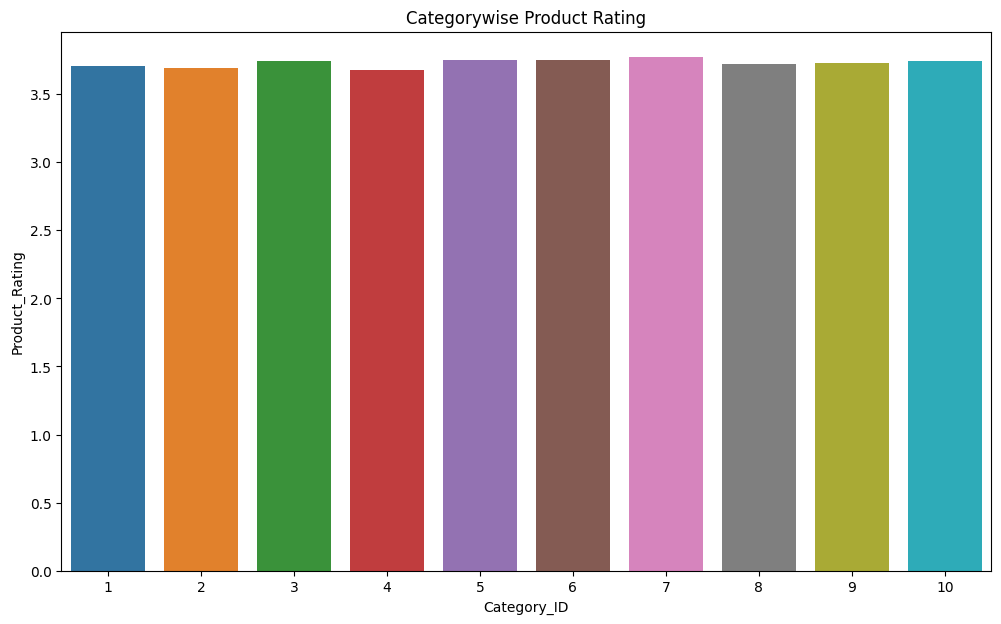

In [25]:
# Most rated category based on product rating

prod_rating = df.groupby('Category_ID')['Product_Rating'].mean().round(2).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(prod_rating,x='Category_ID',y='Product_Rating')
plt.title('Categorywise Product Rating')
plt.show()

In [26]:
# New Feature - MRP Original price calculated as MRP = (product_price + product_price*discount)
df.insert(0,'MRP',round(df['Product_Price'] + df['Product_Price'] * df['Discount_Rate'],2))
df.head()

,MRP,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,235.61,199.67,0.18,4.41,62,1,9,0.19,5
1,141.62,136.17,0.04,3.03,201,1,3,0.38,10
2,274.91,214.77,0.28,2.87,479,1,19,0.06,4
3,329.51,302.30,0.09,4.47,252,1,11,0.33,7
4,178.48,126.58,0.41,3.55,671,1,14,0.67,6


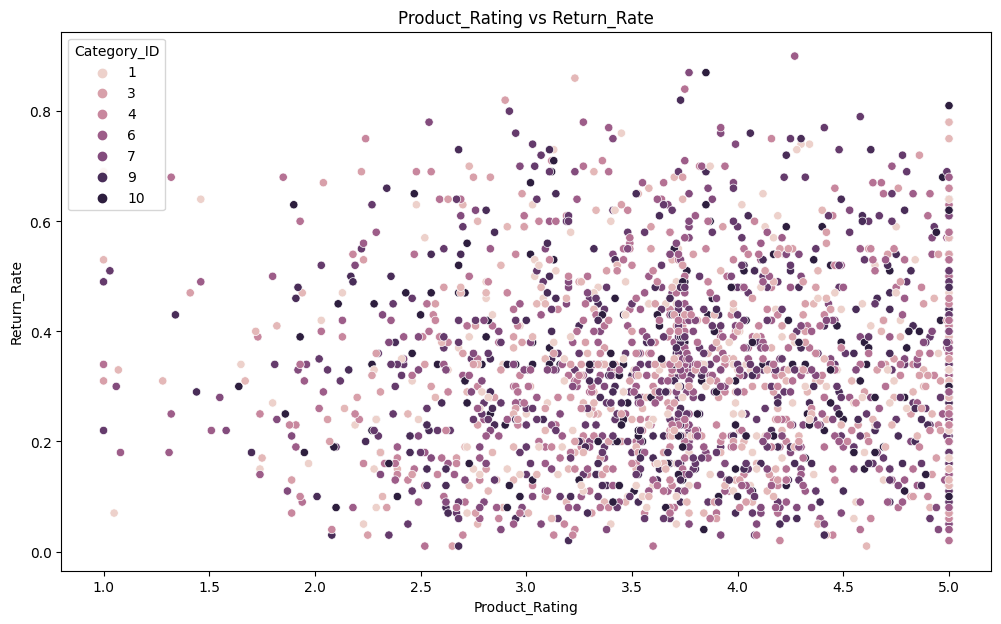

In [27]:
# product rating vs return rate

plt.figure(figsize=(12,7))
sns.scatterplot(df,x='Product_Rating',y='Return_Rate',hue='Category_ID')
plt.title('Product_Rating vs Return_Rate')
plt.show()

In [28]:
# Top 5 best-selling categories (based on return rate & stock availability)
cat_df = df[df['Stock_Availability'] == 1]
(cat_df.groupby(['Category_ID'])['Return_Rate'].mean().round(2)).reset_index().sort_values(by='Return_Rate',ascending=False)[:5]

,Category_ID,Return_Rate
2,3,0.34
4,5,0.34
7,8,0.34
9,10,0.34
6,7,0.33


In [29]:
# High-priced products with low ratings (identify quality issues)

df[(df['Product_Rating'] == df['Product_Rating'].min()) & (df['Stock_Availability'] == 1)].sort_values(by='Product_Price',ascending=False)

,MRP,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
1698,205.42,201.39,0.02,1.0,361,1,30,0.69,1
1281,190.12,157.12,0.21,1.0,681,1,7,0.49,8
508,174.98,154.85,0.13,1.0,176,1,7,0.53,2
1473,209.03,151.47,0.38,1.0,11,1,27,0.34,5
1918,209.11,133.19,0.57,1.0,1537,1,7,0.31,3
344,121.42,102.90,0.18,1.0,660,1,28,0.87,3
1826,53.66,40.96,0.31,1.0,234,1,20,0.22,8


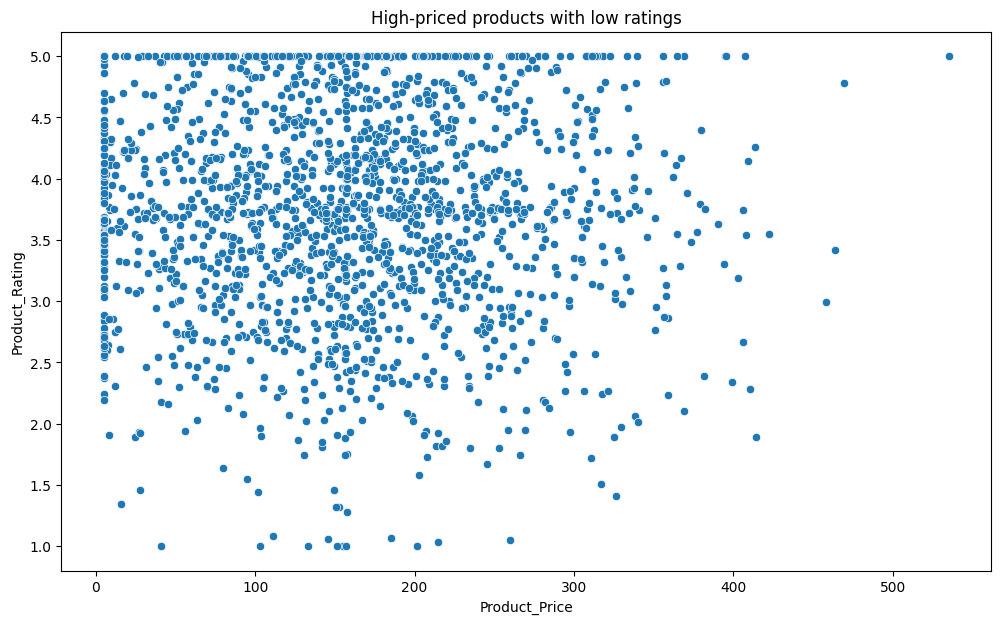

In [30]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Product_Price', y='Product_Rating', data=df[df['Stock_Availability'] == 1])
plt.title('High-priced products with low ratings')
plt.show()

In [31]:
# Avg. discount given per category

df.groupby('Category_ID')['Discount_Rate'].mean().round(2).reset_index()

,Category_ID,Discount_Rate
0,1,0.26
1,2,0.30
2,3,0.31
3,4,0.30
4,5,0.28
5,6,0.28
6,7,0.28
7,8,0.29
8,9,0.29
9,10,0.29


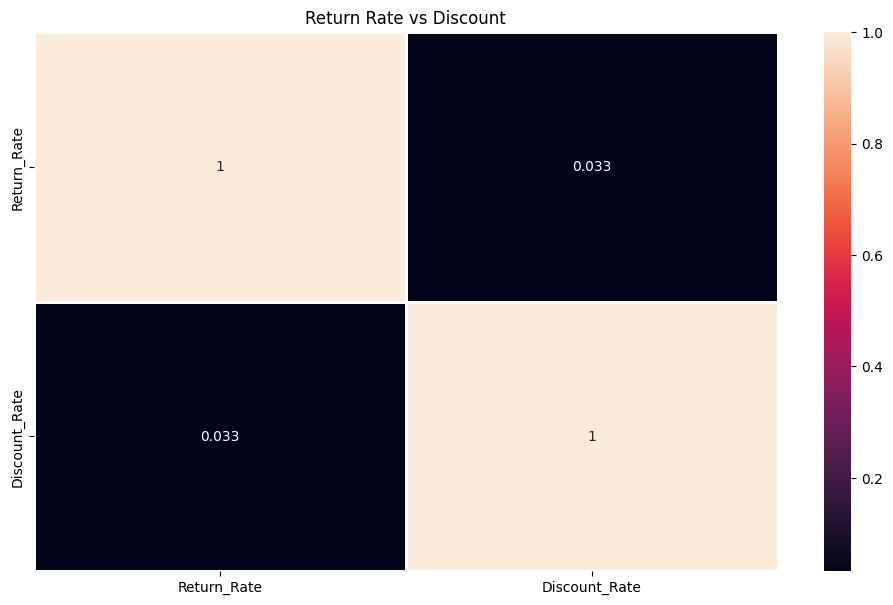

In [32]:
# Return Rate vs Discount – Are heavily discounted products returned more?
plt.figure(figsize=(12,7))
sns.heatmap(df[['Return_Rate','Discount_Rate']].corr(), annot=True, linewidth = 1)
plt.title('Return Rate vs Discount')
plt.show()

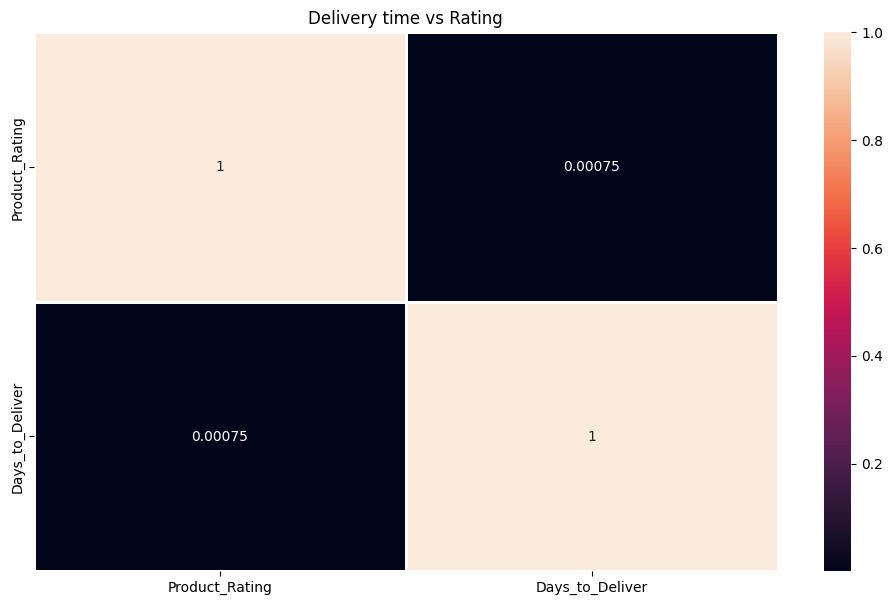

In [33]:
# Delivery time vs Rating – Does faster delivery mean better rating?
plt.figure(figsize=(12,7))
sns.heatmap(df[['Product_Rating','Days_to_Deliver']].corr(), annot=True, linewidth = 1)
plt.title('Delivery time vs Rating')
plt.show()

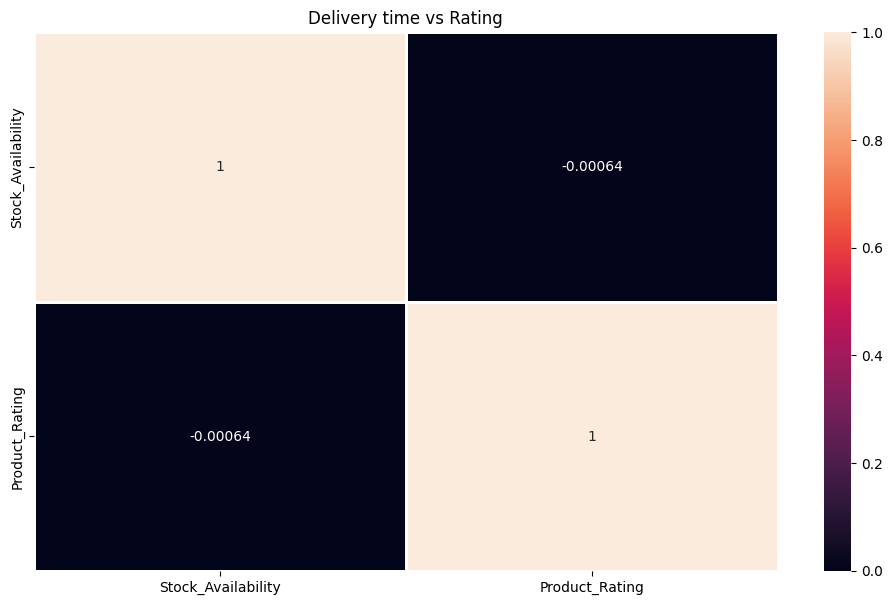

In [34]:
# Stock Availability vs Rating – Are highly rated products often out of stock?

plt.figure(figsize=(12,7))
sns.heatmap(df[['Stock_Availability','Product_Rating']].corr(), annot=True, linewidth = 1)
plt.title('Delivery time vs Rating')
plt.show()

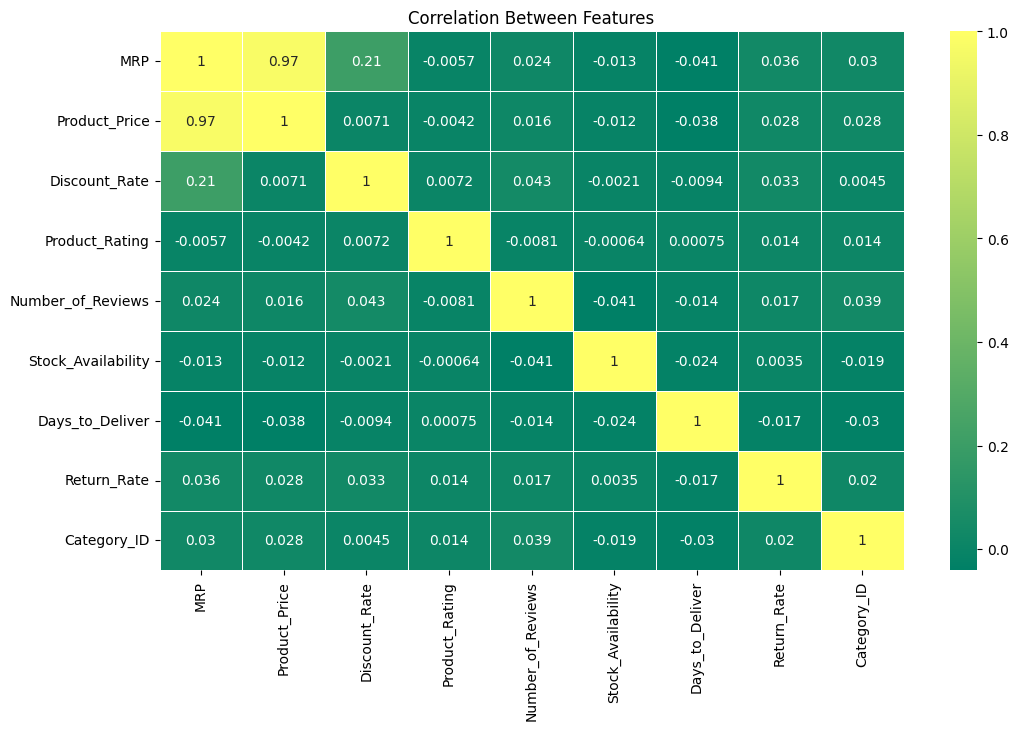

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap = 'summer')
plt.title('Correlation Between Features')
plt.show()

## 5. ✅ Findings & Conclusions


* **Top Categories:**
    Some product categories consistently perform well in terms of stock availability and low return rates. These are possibly customer favorites and show good quality.

* **Product Rating & Delivery Time:**
    There is no strong relationship between delivery time and product rating. So, faster delivery does not always mean higher customer satisfaction.

* **High-Priced Products with Low Ratings:**
    A few expensive products still received poor ratings. This could mean quality issues or mismatch in customer expectations.

* **Product Pricing & Discounts:**
    Discounts vary across categories, but even discounted products may not guarantee better ratings. Price alone doesn’t decide satisfaction.

* **Category-wise Trends:**
    Each category behaves differently — in terms of delivery time, return rate, and ratings. Understanding these trends can help sellers improve service.

* **Stock Unavailability:**
    Some products are constantly unavailable. Sellers should restock these fast-moving or in-demand items.

* **Return Rate Insights:**
    Categories with high return rates may have sizing/quality/expectation issues. These need more attention.
